Нам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируем данные и проверим некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from scipy import stats as st

## Загрузка данных.

##### Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы. 

In [2]:
#Загрузим данные из файлов, сохраним в датафреймы
data_users = pd.read_csv('/datasets/users_go.csv')
data_rides = pd.read_csv('/datasets/rides_go.csv')
data_subs =  pd.read_csv('/datasets/subscriptions_go.csv')
pd.set_option('display.max_columns', None)

##### Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме

In [3]:
# Посмотрим первые пять строк датафреймов
display(data_users.head())
display(data_rides.head())
display(data_subs.head())

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [4]:
#Выведем общую информацию по каждому датафрейму
display(data_users.info())
display(data_rides.info())
display(data_subs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

У нас есть 3 набора с данными:
- В первом наборе содержится 5 столбцов и 1565 строк с данными о пользователях сервиса (id, имя, возвраст, город, тип подписки).
- Во втором наборе данных 4 столбца и 18068 строк с данными о совершенных поездках (id, расстояние, длительность, дата).
- Третий набор данных содержит 4 столбца и 2 строки с данными о цене поездок для пользователей без и с подпиской.

## Предобработка данных.

##### Приведите столбец date к типу даты pandas.

In [5]:
#Приведем столбец date в датафрейме data_rides к типу даты pandas
data_rides['date'] = pd.to_datetime(data_rides['date'], format='%Y-%m-%d')

##### Создайте новый столбец с номером месяца на основе столбца date.

In [6]:
#Создадим новый столбец с номером месяца на основе столбца date
data_rides['month'] = data_rides['date'].dt.month
#Проверяем
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


##### Проверьте наличие пропущенных значений и дубликатов в датафреймах.

In [7]:
# Округлим значения столбцов distance и duration до десятых
data_rides['distance'] = data_rides['distance'].round(2)
data_rides['duration'] = data_rides['duration'].round(2)
#Проверяем
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.92,25.60,2021-01-01,1
1,1,2617.59,15.82,2021-01-18,1
2,1,754.16,6.23,2021-04-20,4
3,1,2694.78,18.51,2021-08-11,8
4,1,4028.69,26.27,2021-08-28,8


In [8]:
# Округлим каждое значение из столбца duration с помощью «потолка» для дальнейшей работы
data_rides['duration'] = np.ceil(data_rides['duration']) 
data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.92,26.0,2021-01-01,1
1,1,2617.59,16.0,2021-01-18,1
2,1,754.16,7.0,2021-04-20,4
3,1,2694.78,19.0,2021-08-11,8
4,1,4028.69,27.0,2021-08-28,8


In [9]:
#Посмотрим на количество явных дубликатов в датафрейимах data_users и data_rides
display(data_users.duplicated().sum())
display(data_rides.duplicated().sum())

31

0

In [10]:
#Удалим строки с явными дубликатами по id
data_users.drop_duplicates(subset=['user_id'], inplace=True)
data_users.reset_index(drop=True)
display(data_users.duplicated().sum())

0

In [11]:
display(data_users.info())
display(data_rides.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


None

Предобработка данных завершена:
- Столбец date в датафрейме data_rides приведен к типу данных datetime64
- Добавлен cтолбец month
- Округлены значения в столбцах distance и duration
- Удалены явные дубликаты в датафрейме data_users

## Исследовательский анализ данных.

Необходимо описать и визуализировать общую информацию о пользователях и поездках.

##### Проанализируем частоту встречаемости городов в нашем наборе данных.

In [12]:
#Посмотрим уникальные названия городов в data_users
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [13]:
#Построим сводную таблицу
display(data_users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False));

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


Построим столбчатую диаграмму по частоте встречаемости городов.

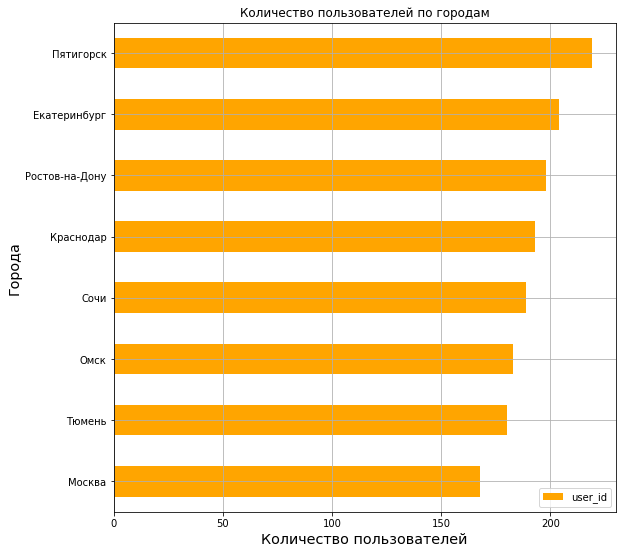

In [14]:
#Частота встречаемости городов в датафрейме
(
   data_users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=True)
             .plot(kind='barh', grid=True, figsize=(9, 9), color = ['Orange'])
)
plt.title('Количество пользователей по городам')
plt.ylabel('Города', size='x-large')
plt.xlabel('Количество пользователей', size='x-large')
plt.show()

**Вывод**: наиболее часто услугами по аренде самокатов GoFast пользуются в Пятигорске, Екатеринбурге и Ростове-на-Дону. Количество пользователей по городам распределено относительно равно от 168 в Москве до 219 в Пятигорске.

##### Проанализируем соотношение пользователей с подпиской и без подписки.

Построим круговую диаграмму с разделением пользователей по наличию и отсутствию подписки.

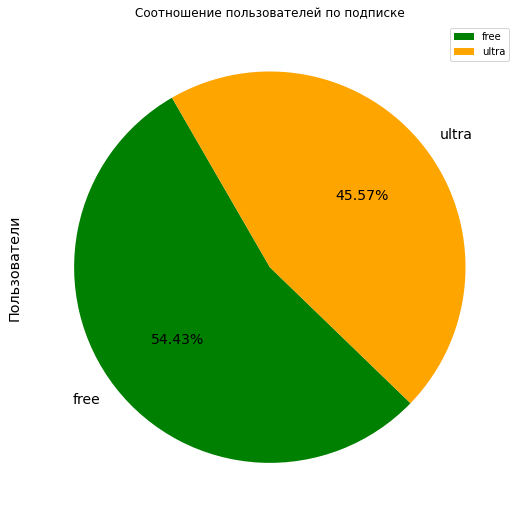

In [15]:
#Cоотношение пользователей с подпиской и без подписки
(
data_users.pivot_table(index= 'subscription_type', values = 'user_id', aggfunc = 'count')
          .plot.pie(y='user_id', grid=True,  figsize=(9, 9), title='Соотношение пользователей по подписке', 
                    autopct = "%.2f%%", colors=['Green', 'Orange'], startangle=120, fontsize=14)
);
plt.ylabel('Пользователи', size='x-large');

**Вывод**: 54.43% процента пользователей не имеют подписки, 45.57% - пользуются услугами проката с подпиской.

##### Проанализируем возраст пользователей сервиса.

Построим столбчатую диаграмму по возрасту пользователей.

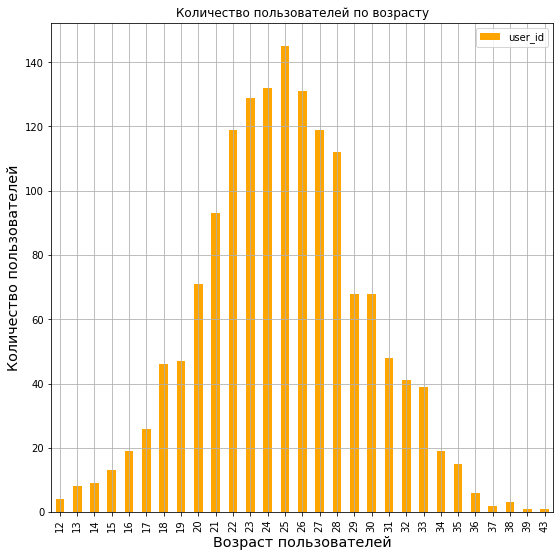

In [16]:
#Возраст пользователей
(
data_users.pivot_table(index= 'age', values = 'user_id', aggfunc = 'count')
          .sort_values(by='age', ascending = True)
          .plot(kind='bar', grid=True,  figsize=(9, 9), title='Количество пользователей по возрасту', 
                color = "orange", style='o')
);
plt.ylabel('Количество пользователей', size='x-large')
plt.xlabel('Возраст пользователей', size='x-large')
plt.show()

In [17]:
data_users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

**Вывод**: Большая часть пользователей сервиса составляют люди в возрасте от 22 до 28 лет. Средний возраст пользователя - 25 лет.

##### Проанализруем расстояние, которое пользователь преодолел за одну поездку.

In [18]:
#Выведем описательную статистику по столбцу distance
data_rides['distance'].describe()

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

Построим столбчатую диаграмму, возьмем примерные границы первого квартиля (25%) -1 стандартное отклонение и четвертого (75%) 
+1 стандартное отклонение.

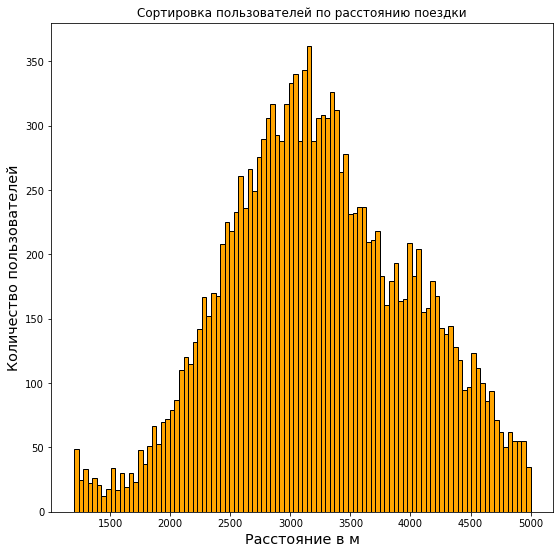

In [19]:
plt.figure(figsize=(9,9),facecolor='white',edgecolor='black')
plt.hist(data_rides['distance'], bins=100, range=(1200, 5000), color = "orange", ec='black')
plt.title('Сортировка пользователей по расстоянию поездки')
plt.xlabel('Расстояние в м', size='x-large')
plt.ylabel('Количество пользователей', size='x-large');

**Вывод**: В среднем пользователь проезжает во время одной поездки от 2.5 км до 3.5 км.

##### Проанализируем продолжительность поездок.

In [20]:
#Выведем описательную статистику по столбцу duration
data_rides['duration'].describe()

count    18068.000000
mean        18.297653
std          6.093955
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

Построим столбчатую диаграмму, возьмем примерные границы первого квартиль (25%) -1 стандартное отклонение и четвертого (75%) 
+1 стандартное отклонение.

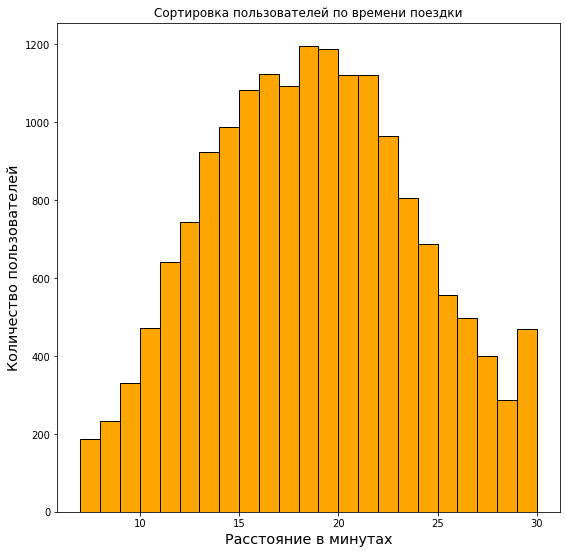

In [21]:
plt.figure(figsize=(9,9),facecolor='white',edgecolor='black')
plt.hist(data_rides['duration'], bins=23, range=(7, 30), color = "orange", ec='black')
plt.title('Сортировка пользователей по времени поездки')
plt.xlabel('Расстояние в минутах', size='x-large')
plt.ylabel('Количество пользователей', size='x-large');

**Вывод**: Большая часть поездок длятся от 14 до 22 минут.

## Объединение данных.

##### Объединим данные о пользователях, поездках и подписках в один датафрейм.

In [22]:
#Объеденим данные датафреймов data_users и data_rides с помощью метода merge()
data_sub1 = data_users.merge(data_rides, on='user_id', how='left')
display(data_sub1.head())
display(data_sub1.tail())

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8


,user_id,name,age,city,subscription_type,distance,duration,date,month
18063,1534,Альберт,25,Краснодар,free,3781.10,20.0,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.42,22.0,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.19,19.0,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.31,17.0,2021-11-27,11
18067,1534,Альберт,25,Краснодар,free,2371.71,16.0,2021-12-29,12


In [23]:
# Объединим данные предыдущего датафрейма с data_subs
data_full = data_sub1.merge(data_subs, on='subscription_type', how='left')
display(data_full.head())
display(data_full.tail())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
18063,1534,Альберт,25,Краснодар,free,3781.10,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17.0,2021-11-27,11,8,50,0
18067,1534,Альберт,25,Краснодар,free,2371.71,16.0,2021-12-29,12,8,50,0


In [24]:
#Посмотрим на данные нового датафрейма
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


У нас получился новый датафрейм c 18068 строк, что соответствует количеству строк data_rides.

##### Создадим два отдельных датафрейма с пользователями с подпиской и без.

In [25]:
# Пользователи с подпиской
data_has_subs = data_full[data_full['subscription_type'] == 'ultra']
data_has_subs.tail()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6495,699,Оксана,22,Москва,ultra,3973.05,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,16.0,2021-10-17,10,6,0,199
6499,699,Оксана,22,Москва,ultra,3202.89,26.0,2021-12-03,12,6,0,199


In [26]:
len(data_has_subs)

6500

In [27]:
# Пользователи без подписки
data_no_subs = data_full[data_full['subscription_type'] == 'free']
data_no_subs.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18.0,2021-02-14,2,8,50,0


In [28]:
len(data_no_subs)

11568

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

Построим две столбчатые диаграммы по нашим датафреймам data_has_subs и data_no_subs.

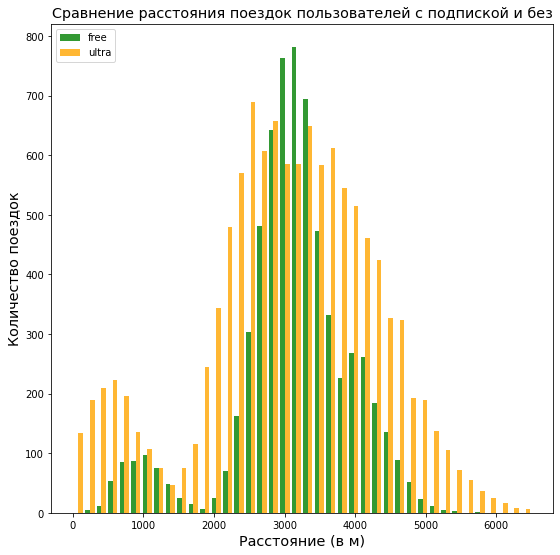

In [29]:
plt.figure(figsize=(9,9),facecolor='white',edgecolor='black')
plt.hist([data_has_subs['distance'], data_no_subs['distance']], color=['Green', 'Orange'], label=['free', 'ultra'], 
         bins=40, range=(0,6500),  linewidth=2, alpha=0.8)
plt.title('Сравнение расстояния поездок пользователей с подпиской и без', size='x-large')
plt.xlabel('Расстояние (в м)', size='x-large')
plt.ylabel('Количество поездок', size='x-large')
plt.legend(loc='upper left')
plt.show();

In [30]:
data_has_subs['distance'].describe()

count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

In [31]:
data_no_subs['distance'].describe()

count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64

Из описательной статистики и графика видно, что пользователи с подпиской более склонны как к более коротким поездкам, так и более длительным, чем пользователи без подписки. Это говорит нам о том, что пользователь с подпиской гораздо сильнее вовлечен в использование сервиса.

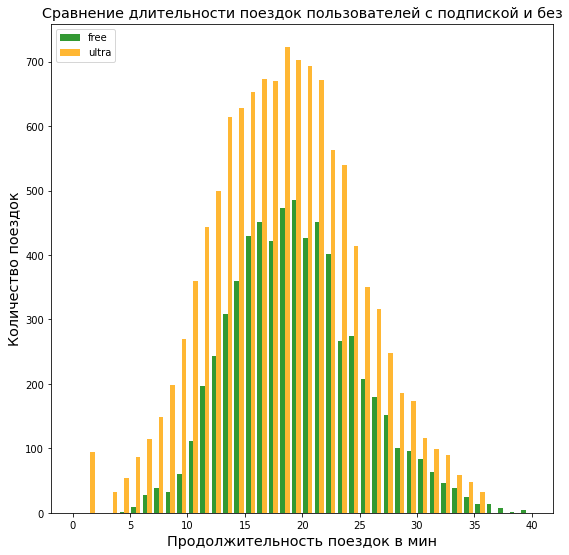

In [32]:
plt.figure(figsize=(9,9),facecolor='white',edgecolor='black')
plt.hist([data_has_subs['duration'], data_no_subs['duration']], color=['Green', 'Orange'], label=['free', 'ultra'], 
         bins=40, range=(0,40),  linewidth=2, alpha=0.8)
plt.title('Сравнение длительности поездок пользователей с подпиской и без', size='x-large')
plt.xlabel('Продолжительность поездок в мин', size='x-large')
plt.ylabel('Количество поездок', size='x-large')
plt.legend(loc='upper left')
plt.show();

In [33]:
data_has_subs['duration'].describe()

count    6500.000000
mean       19.030000
std         5.576327
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [34]:
data_no_subs['duration'].describe()

count    11568.000000
mean        17.886151
std          6.329523
min          1.000000
25%         13.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

Из описательной статистики и графика видно, что пользователи с подпиской чаще пользуются сервисом для совершения поездок, чем пользователи без.

#### Шаг 5. Подсчёт выручки.

##### Создание агрегированного датафрейма.

Создадим новый датафрейм revenue_per_user_data с агрегированными данными по пользователям и месяцам. Нас интересуют пройденное расстояние, общая продолжительность поездок и их количество. 

In [35]:
# Построим свободную таблицу с агрегированным данными
data_revenue = data_full.pivot_table(index=('user_id', 'month'), 
                                              values = ['distance', 'duration', 'name', 'subscription_type'],
                                              aggfunc = {'distance': sum, 
                                                         'duration' : sum, 
                                                         'name' : len,
                                                         'subscription_type' : min})
# Переименуем столбец name, т.к. при применении функции len он показывает количество поездок за один месяц
data_revenue.rename(columns = {'name' : 'trips_total'}, inplace = True)
# Выведем первые 15 строк датафрейма
data_revenue.head(15)

distance  duration  trips_total subscription_type
user_id month                                                   
1       1       7027.51      42.0            2             ultra
        4        754.16       7.0            1             ultra
        8       6723.47      46.0            2             ultra
        10      5809.91      32.0            2             ultra
        11      7003.50      56.0            3             ultra
        12      6751.63      28.0            2             ultra
2       3      10187.73      63.0            3             ultra
        4       6164.39      40.0            2             ultra
        6       3255.34      14.0            1             ultra
        7       6780.73      48.0            2             ultra
        8        923.01       7.0            1             ultra
        10      2824.64      19.0            1             ultra
        12      3828.25      12.0            1             ultra
3       1       3061.78      13.0            1             ultra
        2       5421.16      39.0            2             ultra

##### Добавление столбца с помесячной выручкой.

Помесячная выручка считается по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки. Создадим отдельную функцию для расчета выручки для пользователей с подпиской и без, применим ее к новому датафрейму:

In [36]:
# Создадим функцию
def revenue_calc(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['duration'] + 199
    if row['subscription_type'] == 'free':
        return 8 * row['duration'] + 50 * row['trips_total']
    else:
        return 'no info'

In [37]:
# Создадим новый столбец и применим функцию
data_revenue['monthly_revenue'] = data_revenue.apply(revenue_calc, axis=1)

In [38]:
# Выведем первые 20 строк датафрейма
data_revenue.head(20)

distance  duration  trips_total subscription_type  \
user_id month                                                      
1       1       7027.51      42.0            2             ultra   
        4        754.16       7.0            1             ultra   
        8       6723.47      46.0            2             ultra   
        10      5809.91      32.0            2             ultra   
        11      7003.50      56.0            3             ultra   
        12      6751.63      28.0            2             ultra   
2       3      10187.73      63.0            3             ultra   
        4       6164.39      40.0            2             ultra   
        6       3255.34      14.0            1             ultra   
        7       6780.73      48.0            2             ultra   
        8        923.01       7.0            1             ultra   
        10      2824.64      19.0            1             ultra   
        12      3828.25      12.0            1             ultra   
3       1       3061.78      13.0            1             ultra   
        2       5421.16      39.0            2             ultra   
        4       2956.65      21.0            1             ultra   
        5       9064.03      63.0            3             ultra   
        7      10919.59      67.0            3             ultra   
        9       2891.01      23.0            1             ultra   
        12      2593.38      13.0            1             ultra   

               monthly_revenue  
user_id month                   
1       1                451.0  
        4                241.0  
        8                475.0  
        10               391.0  
        11               535.0  
        12               367.0  
2       3                577.0  
        4                439.0  
        6                283.0  
        7                487.0  
        8                241.0  
        10               313.0  
        12               271.0  
3       1                277.0  
        2                433.0  
        4                325.0  
        5                577.0  
        7                601.0  
        9                337.0  
        12               277.0

In [39]:
# Посчитаем общую выручку сервиса
print('Общая выручка составила', data_revenue['monthly_revenue'].sum(), 'рублей')

Общая выручка составила 3877893.0 рублей


## Проверка гипотез.

##### Гипотеза: тратят ли пользователи с подпиской больше времени на поездки.

Проверим, насколько пользователи с подпиской выгоднее для компании. Выдвенем две гипотезы:

H_0 : Время поездки пользователя с подпиской ultra равно времени пользователя без подписки.

H_1: Время поезкди пользователя с подпиской ultra больше времени пользователя без подписки.

In [40]:
sub = data_has_subs['duration']
no_sub = data_no_subs['duration']
alpha = 0.01
results = st.ttest_ind(sub, 
                       no_sub,
                       alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 3.533140224216126e-34
Отвергаем нулевую гипотезу


**Вывод:** Время поездки пользователя с подпиской больше времени пользователя без нее.

##### Гипотеза: среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Проверим, насколько достоверным является факт, что пользователи с подпиской за поездку проезжают больше 3130 метров.

H_0 : Пройденное расстояние пользователя с подпиской равно 3130 метров.

H_1: Пройденное расстояние пользователя с подпиской больше 3130 метров.

In [41]:
sub = data_has_subs['distance']
distance_value = 3130
alpha = 0.01
results = st.ttest_1samp(sub, 
                         distance_value,
                         alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 0.9195362605842414
Не удалось отвергнуть нулевую гипотезу


**Вывод:** Нулевую гипотезу не удалось отвергнуть, мы можем сделать вывод, что при уровне значимости в 1%, расстояние, которое проедет подписчик сервиса не будет превышать 3130 метров.

##### Гипотеза: помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

H_0 : Помесячная выручка от пользователей с подпиской равна выручке от пользователя без нее.

H_1: Помесячная выручка от пользователей с подпиской больше выручки от пользователей без нее.

In [42]:
sub = data_revenue.loc[data_revenue['subscription_type'] == 'ultra', 'monthly_revenue']
no_sub = data_revenue.loc[data_revenue['subscription_type'] == 'free', 'monthly_revenue']
alpha = 0.01
results = st.ttest_ind(sub, 
                       no_sub,
                       alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение: 1.8164914860049708e-31
Отвергаем нулевую гипотезу


**Вывод:** Нулевая гипотеза отвергнута, пользователи с подпиской приносят большую выручку компании.

##### Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Ответ**: в таком случае используется гипотеза о равенстве средних для зависимых (парных) выборок. Можно представить, что мы анализируем одну генеральную совокупность, с которой произошли некоторые изменения.

Гипотезы буду сформилированы следующим образом:
- H_0 : μ1 = μ2
- H_1 : μ1 != μ2

где μ1 и μ2 - средние значения до и после изменения.

При этой гипотезе используется тест **scipy.stats.ttest_rel()**.

## Общий вывод.

Проведено небольшое исследование по анализу файлов с данными users_go.csv, rides_go.csv, subscriptions_go.csv.

В ходе работы было осуществлена предобработка соответствующих датафреймов data_users, data_rides, data_subs. 

В ходе исследовательского анализа данных мы узнали:
- Наиболее популярные города у пользователей сервиса: Пятигорск, Екатеринбург и Ростов-на-Дону. Пользователи в нашей выборке распределены по городам относительно равномерно.
- Соотношение пользователей с подпиской и без: 54.43% процента пользователей не имеют подписки, 45.57% - пользуются услугами проката с подпиской.
- Основная аудитория сервиса люди от 20 до 30 лет.
- Среднестатистический пользователь за одну поездку проезжает 3.07 км.
- Средняя продолжительность поездки составляет 18.20 мин.

Создан общий датафрейм data_full, объединяющий данные из data_users, data_rides, data_subs. Также созданы датафреймы data_has_subs и data_no_subs, объединяющих пользователей с подпиской и без.

В ходе анализа данных датафреймов data_has_subs и data_no_subs мы выяснили:
- Пользователи с подпиской в среднем во время использования сервиса проезжают большее расстояние, чем пользователи без подписки.
- Средняя поездка пользователя с подпиской дольше, чем пользователя без подписки.

В ходе исследования были выдвинуты несколько гипотез из которых мы выяснили:
- Мы потдвердили, что пользователи с подпиской тратят больше времени на поездки с использованием сервиса.
- Мы подтвердили, что подписчик сервиса не проезжает расстояние больше 3130 метров за одну поездку.
- Определили, что пользователи с подпиской приносят компании большую выручку.